<h1> City of Pittsburgh Commute and Road Data </h1>
</br>

<p1> To answer our question of finding the most traversable neighborhood in Pittsburgh, I have chosen to analyze the percentage of different types of commuting from each neighborhood. This data combined with data on the Street density per neighborhood, I hope to find the best neighborhood from traversing. I will use this data to find which neighborhood has the least amount of people commuting to work by cars, which would mean less traffic, then by looking at the remaining data and finding which neighborhood has the most diversity in means of commuting. Then combine the Street density, which would show the availability of roads for transport in each neighborhood. </p1>
</br>
__________________________________________________________________________________________________________________________________

In [105]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

First we have our imports, Pandas, Numpy and Matplotlib.

Then we read in the data from transportation.csv, and drop the rows that are missing a value to help keep our data accurate.
The data came in alphabetical order based on Neighborhoods, so there was no need to reorder the original data. 

In [106]:

transport_2010 = pd.read_csv("transportation.csv") 
#Reading in our csv data
transport_2010 = transport_2010.dropna()
#Dropping out any data that is N/A, to keep our data accurate.
transport_2010.head(10)
#no need to sort the data, because it is already sorted in order of Neighborhoods

,Neighborhood,Sector #,Population (2010),Miles of Major Roads,Total Street Miles,Street Density (st. mi/area sq. mi),# Sets of Steps,# Step Treads,Res. Permit Parking Area(s),Total Working Pop. (Age 16+) (2010),Commute to Work: Drive Alone (2010),Commute to Work: Carpool/Vanpool (2010),Commute to Work: Public Transportation (2010),Commute to Work: Taxi (2010),Commute to Work: Motorcycle (2010),Commute to Work: Bicycle (2010),Commute to Work: Walk (2010),Commute to Work: Other (2010),Work at Home (2010)
0,Allegheny Center,3,933,2.23,4.14,19.7,0,0,None,386,27.7%,9.8%,16.8%,0.0%,0.0%,0.0%,43.8%,0.0%,1.8%
1,Allegheny West,3,462,1.47,4.87,34.5,0,0,G,151,23.2%,20.5%,15.9%,14.6%,0.0%,0.0%,25.8%,0.0%,0.0%
2,Allentown,6,"2,500",1.65,12.33,41.8,12,474,None,824,47.0%,10.9%,38.0%,0.0%,0.8%,0.0%,0.0%,1.5%,1.8%
3,Arlington,7,"1,869",0.86,10.73,22.8,13,428,None,673,74.0%,7.3%,13.5%,0.0%,0.0%,0.0%,1.9%,0.9%,2.4%
4,Arlington Heights,7,244,0.00,1.09,8.2,0,0,None,72,11.1%,0.0%,88.9%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
5,Banksville,5,"4,144",5.99,18.33,18.9,4,322,None,"2,506",81.5%,5.9%,11.7%,0.0%,0.0%,0.0%,0.7%,0.2%,0.0%
6,Bedford Dwellings,15,"1,202",0.97,4.48,25.1,3,234,None,305,36.7%,16.7%,33.8%,0.0%,0.0%,0.0%,12.8%,0.0%,0.0%
7,Beechview,5,"7,974",6.42,30.75,21.1,39,"2,494","BB, T","3,909",55.1%,15.3%,21.2%,0.0%,0.0%,0.6%,5.3%,0.0%,2.6%
8,Beltzhoover,6,"1,925",3.32,17.26,41.0,16,595,None,706,45.8%,8.1%,43.1%,0.0%,0.0%,0.0%,0.0%,0.0%,3.1%
9,Bloomfield,12,"8,442",3.80,31.74,45.2,3,131,"H, R","5,117",42.0%,9.3%,20.0%,0.0%,0.8%,6.4%,18.8%,0.0%,2.6%


In [132]:

Commute = pd.read_csv("transportation.csv",usecols=['Neighborhood','Commute to Work: Drive Alone (2010)','Commute to Work: Carpool/Vanpool (2010)','Commute to Work: Public Transportation (2010)',
                                                   'Commute to Work: Taxi (2010)','Commute to Work: Motorcycle (2010)','Commute to Work: Bicycle (2010)','Commute to Work: Walk (2010)','Commute to Work: Other (2010)'])
#Commute is reading data from transportation.csv, but only using Columns relevant to the first data analysis, which is based on the Commutes to work.

Commute['Commute to Work: Drive Alone (2010)'] = Commute['Commute to Work: Drive Alone (2010)'].str.rstrip('%').astype('float')
Commute['Commute to Work: Carpool/Vanpool (2010)'] = Commute['Commute to Work: Carpool/Vanpool (2010)'].str.rstrip('%').astype('float')
Commute['Commute to Work: Public Transportation (2010)'] = Commute['Commute to Work: Public Transportation (2010)'].str.rstrip('%').astype('float')
Commute['Commute to Work: Taxi (2010)'] = Commute['Commute to Work: Taxi (2010)'].str.rstrip('%').astype('float')
Commute['Commute to Work: Motorcycle (2010)'] = Commute['Commute to Work: Motorcycle (2010)'].str.rstrip('%').astype('float')
Commute['Commute to Work: Bicycle (2010)'] = Commute['Commute to Work: Bicycle (2010)'].str.rstrip('%').astype('float')
Commute['Commute to Work: Walk (2010)'] = Commute['Commute to Work: Walk (2010)'].str.rstrip('%').astype('float')
Commute['Commute to Work: Other (2010)'] = Commute['Commute to Work: Other (2010)'].str.rstrip('%').astype('float')
#Above is changing the percentages, by removing them and changing them to float values instead so it can be easily represented in a plot.

Commute = Commute.dropna()
Commute.head(10)

,Neighborhood,Commute to Work: Drive Alone (2010),Commute to Work: Carpool/Vanpool (2010),Commute to Work: Public Transportation (2010),Commute to Work: Taxi (2010),Commute to Work: Motorcycle (2010),Commute to Work: Bicycle (2010),Commute to Work: Walk (2010),Commute to Work: Other (2010)
0,Allegheny Center,27.7,9.8,16.8,0.0,0.0,0.0,43.8,0.0
1,Allegheny West,23.2,20.5,15.9,14.6,0.0,0.0,25.8,0.0
2,Allentown,47.0,10.9,38.0,0.0,0.8,0.0,0.0,1.5
3,Arlington,74.0,7.3,13.5,0.0,0.0,0.0,1.9,0.9
4,Arlington Heights,11.1,0.0,88.9,0.0,0.0,0.0,0.0,0.0
5,Banksville,81.5,5.9,11.7,0.0,0.0,0.0,0.7,0.2
6,Bedford Dwellings,36.7,16.7,33.8,0.0,0.0,0.0,12.8,0.0
7,Beechview,55.1,15.3,21.2,0.0,0.0,0.6,5.3,0.0
8,Beltzhoover,45.8,8.1,43.1,0.0,0.0,0.0,0.0,0.0
9,Bloomfield,42.0,9.3,20.0,0.0,0.8,6.4,18.8,0.0


<h1> Combining Data </h1>

In [133]:
Commute['Commute to Work: Drive Alone (2010)'] = Commute['Commute to Work: Drive Alone (2010)'] + Commute['Commute to Work: Carpool/Vanpool (2010)']
# I combine the Commute to work with Commuting by Carpooling/Vanpooling. This is because they both involving commuting with cars, which creates traffic
Commute.rename({'Commute to Work: Drive Alone (2010)':'Commute to Work: By Car (2010)'},inplace=True, axis=1)
#After combining the data, I rename the data so that its understood that the data is combined.
Commute.drop('Commute to Work: Carpool/Vanpool (2010)', axis=1,inplace=True)
#After combining the data, I remove the Carpool/Vanpool so there's no repeat data.
Commute.head(10)

,Neighborhood,Commute to Work: By Car (2010),Commute to Work: Public Transportation (2010),Commute to Work: Taxi (2010),Commute to Work: Motorcycle (2010),Commute to Work: Bicycle (2010),Commute to Work: Walk (2010),Commute to Work: Other (2010)
0,Allegheny Center,37.5,16.8,0.0,0.0,0.0,43.8,0.0
1,Allegheny West,43.7,15.9,14.6,0.0,0.0,25.8,0.0
2,Allentown,57.9,38.0,0.0,0.8,0.0,0.0,1.5
3,Arlington,81.3,13.5,0.0,0.0,0.0,1.9,0.9
4,Arlington Heights,11.1,88.9,0.0,0.0,0.0,0.0,0.0
5,Banksville,87.4,11.7,0.0,0.0,0.0,0.7,0.2
6,Bedford Dwellings,53.4,33.8,0.0,0.0,0.0,12.8,0.0
7,Beechview,70.4,21.2,0.0,0.0,0.6,5.3,0.0
8,Beltzhoover,53.9,43.1,0.0,0.0,0.0,0.0,0.0
9,Bloomfield,51.3,20.0,0.0,0.8,6.4,18.8,0.0


Text(0, 0.5, 'Neighborhoods')

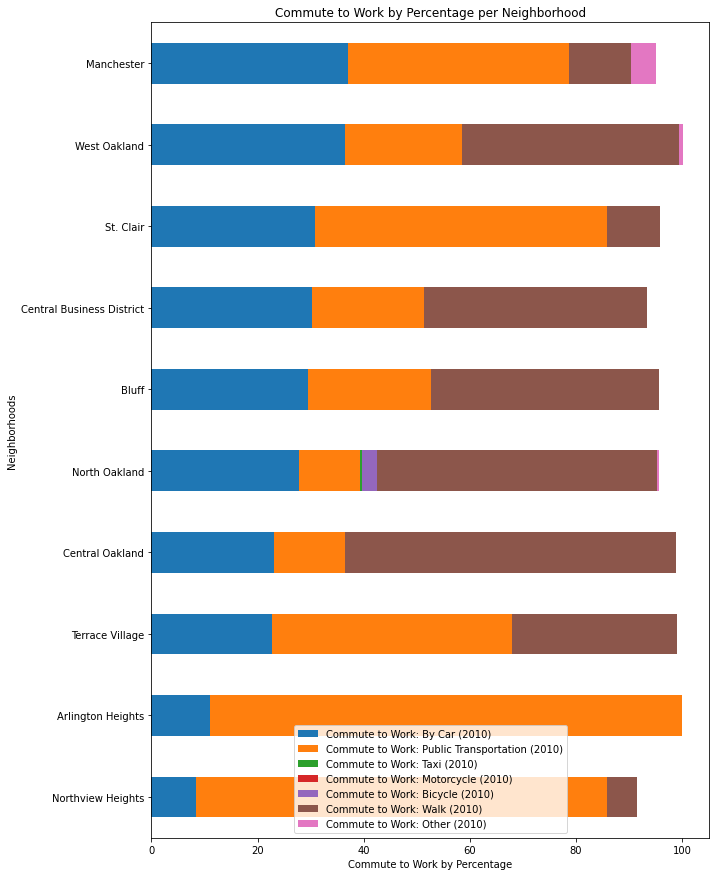

In [135]:

SortCommute = Commute.sort_values(by=["Commute to Work: By Car (2010)"]).head(10)
#I Sort the data by the Commute to work by car, then take the top 10, which gives the top 10 with the least car travel.
SortCommute.plot.barh(x='Neighborhood', figsize=(10,15), stacked=True)
#creating the barh plot.
plt.title("Commute to Work by Percentage per Neighborhood")
plt.xlabel("Commute to Work by Percentage")
plt.ylabel("Neighborhoods")
#Labeling the Barh Plot.

From the Barh graph, we are able to see the top 10 neighborhoods that have the least percentage of people commuting to work by cars. From this data we can see which neighborhoods are most likely to have the least amount of traffic. We can also find which of these has the most diverse range of means of transport. The one that has the most forms of transport, means that it is able to be traversed by multiple means of transport, and with a much lower level of traffic than the neighborhoods not in the top 10. From this graph, we can conclude that the best neighborhood is North Oakland, because of its low amount of car travel, and diversity in its means of transport.


In [137]:
Roads_2010 = pd.read_csv("transportation.csv",usecols=['Neighborhood','Street Density (st. mi/area sq. mi)'])
#We create the Roads data, which is using the street density from the transprotation.csv. We also take in the Neighborhoods.
Roads_2010.head(10)

,Neighborhood,Street Density (st. mi/area sq. mi)
0,Allegheny Center,19.7
1,Allegheny West,34.5
2,Allentown,41.8
3,Arlington,22.8
4,Arlington Heights,8.2
5,Banksville,18.9
6,Bedford Dwellings,25.1
7,Beechview,21.1
8,Beltzhoover,41.0
9,Bloomfield,45.2


In [138]:

RoadData = Roads_2010.sort_values(by=["Street Density (st. mi/area sq. mi)"],ascending=False).head(10)
#I Sort the values in Roads_2010 based on which neighborhood has the largest Street Density
RoadData

,Neighborhood,Street Density (st. mi/area sq. mi)
25,East Allegheny,71.8
10,Bluff,50.4
16,Central Business District,48.2
43,Knoxville,47.7
18,Central Northside,47.0
9,Bloomfield,45.2
56,North Shore,44.9
50,Middle Hill,43.5
23,Crawford-Roberts,43.0
41,Homewood South,41.9


Text(0, 0.5, 'Street Density (st.mi/area sq.mi)')

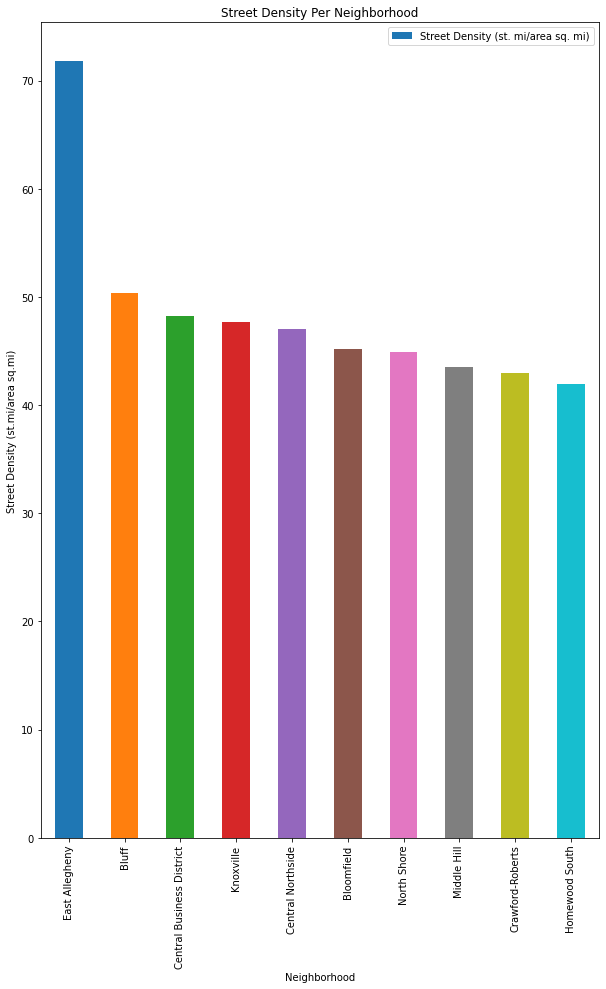

In [139]:

RoadData.plot.bar(x='Neighborhood',y='Street Density (st. mi/area sq. mi)',color=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'],figsize = (10,15))
#This is creating the bar graph of the Neighborhood with the most Street Density, and Colors them differently.
plt.title("Street Density Per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Street Density (st.mi/area sq.mi)")
#Setting the labels on the bar graph.

The above graph is representing the top 10 neighborhoods based on which has the most Street Density (st.mi/area sq.mi). Just from looking at this data, East Allegheny is the clear winner of this represented data. However, comparing this top 10 data with the data represented in the graph of least amount of commuting to work by cars graph, there's two that are on both: Central Business District, and Bluff.

<h1> Conclusion of analyzed data from Street Density, and Commuting </h1> 

From analyzing the Street density to find the neighborhood with the most street available and Commuting data to see which neighborhood had the most available options of travel, the most traversable neighborhood is Bluff, but ever so slightly. Central Business District was a very close second, however Bluff beat it by being 3 higher in st.mi/area sq.mi for Street Density, and by having slightly less people commuting to work by car.